# 텐서플로우(google)
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적 sequentional, functional, class

# 파이토지 (meta)
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인
* class

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.26.4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

/tmp/ipykernel_21723/4145923216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family'] = data['SibSp'] + data['Parch']


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [10]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0
887,1,1,female,19.0,0,0,S,0
888,0,3,female,NaN,1,2,S,3
889,1,1,male,26.0,0,0,C,0


In [11]:
data = data.drop(['SibSp', 'Parch'], axis =1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [12]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [13]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [14]:
data['Embarked'].mode()[0]

'S'

In [15]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [17]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [18]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.615838


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=10)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [24]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624



In [25]:
for i in range(1,20):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i)
    print(classification_report(y_test, pred))

1
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       386
           1       0.74      0.67      0.70       238

    accuracy                           0.78       624
   macro avg       0.77      0.76      0.77       624
weighted avg       0.78      0.78      0.78       624

2
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       386
           1       0.77      0.68      0.72       238

    accuracy                           0.80       624
   macro avg       0.79      0.77      0.78       624
weighted avg       0.80      0.80      0.80       624

3
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624

4
           

# Tensorfolw Sequential API를 사용한 순차적 모델

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-09 12:35:18.136972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 12:35:19.071647: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-09 12:35:19.071757: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-09 12:35:19.075229: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-09 12:35:19.212636: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


## 딥러닝 신경망 모델 정의

In [27]:
# 차원보기
X_train.shape

(267, 6)

In [28]:
X_train.shape[1]

6

In [29]:
# 신경망 모델 정의
model = Sequential()
# 입력층, input_dim : 독립변수의 컬럼 수
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) #Dense 은닉층 이런 층들을 dense라고 부름, dim은 몇 차원이냐
model.add(Dense(64, activation='relu')) #은닉층1
model.add(Dense(32, activation='relu')) #은닉층2
model.add(Dense(16, activation='relu')) #은닉층3
model.add(Dense(1, activation='sigmoid')) #출력층, 이진분류 - 시그모이드(sigmoid)

2024-09-09 12:40:05.721440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 12:40:05.723302: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-09 12:40:05.858311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 12:40:05.858351: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 12:40:05.858371: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

만약 다중분류이면 softmax

# 모델 파라미터 세팅 model.compile()
* loss : 오차 계산 지표
    * 이진분류 : binary_crossentropy
    * 다중분류 : categorical_crossentropy
    * 데이터가 많은 희소행렬인 경우 : sparse_categorical_crossentropy
    * 연속형데이터(회귀분석) : mse
* optimizer : learning_rate
    * adam 을 가장 많이 사용

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
* epochs : 전체 데이터를 한 번 훈련하는 주기
* batch_size : 전체 데이터를 쪼개서 훈련, 메모리에 맞춰서 크기 조절
* validation_data : 검증 데이터로 모델 검증실시

In [32]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 40, validation_data=(X_test, y_test))

Epoch 1/200


2024-09-09 14:14:37.705571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:14:37.790327: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:14:37.790401: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 45ms/step - loss: 0.6879 - accuracy: 0.5843 - val_loss: 0.6667 - val_accuracy: 0.7500
Epoch 2/200
6/7 [========================>.....] - ETA: 0s - loss: 0.6500 - accuracy: 0.8208

2024-09-09 14:14:38.284948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:14:38.311740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:14:38.311806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 23ms/step - loss: 0.6515 - accuracy: 0.7978 - val_loss: 0.6368 - val_accuracy: 0.7885
Epoch 3/200
7/7 [==============================] - 0s 22ms/step - loss: 0.6170 - accuracy: 0.8165 - val_loss: 0.6058 - val_accuracy: 0.8109
Epoch 4/200
7/7 [==============================] - 0s 23ms/step - loss: 0.5794 - accuracy: 0.8202 - val_loss: 0.5686 - val_accuracy: 0.8093
Epoch 5/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5364 - accuracy: 0.8240 - val_loss: 0.5294 - val_accuracy: 0.8045
Epoch 6/200
7/7 [==============================] - 0s 24ms/step - loss: 0.4928 - accuracy: 0.8202 - val_loss: 0.4889 - val_accuracy: 0.8109
Epoch 7/200
7/7 [==============================] - 0s 24ms/step - loss: 0.4476 - accuracy: 0.8165 - val_loss: 0.4619 - val_accuracy: 0.8045
Epoch 8/200
7/7 [==============================] - 0s 21ms/step - loss: 0.4187 - accuracy: 0.8240 - val_loss: 0.4483 - val_accuracy: 0.8077
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 21ms/step - loss: 0.2979 - accuracy: 0.8839 - val_loss: 0.4918 - val_accuracy: 0.8077
Epoch 61/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2977 - accuracy: 0.8764 - val_loss: 0.4934 - val_accuracy: 0.8077
Epoch 62/200
7/7 [==============================] - 0s 23ms/step - loss: 0.3038 - accuracy: 0.8764 - val_loss: 0.4918 - val_accuracy: 0.8013
Epoch 63/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2932 - accuracy: 0.8689 - val_loss: 0.4979 - val_accuracy: 0.8045
Epoch 64/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2954 - accuracy: 0.8727 - val_loss: 0.5002 - val_accuracy: 0.8061
Epoch 65/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2933 - accuracy: 0.8801 - val_loss: 0.4992 - val_accuracy: 0.8077
Epoch 66/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2917 - accuracy: 0.8764 - val_loss: 0.5003 - val_accuracy: 0.8061
Epoch 67/200
7/7 [========

7/7 [==============================] - 0s 22ms/step - loss: 0.2615 - accuracy: 0.8914 - val_loss: 0.6099 - val_accuracy: 0.8029
Epoch 119/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2588 - accuracy: 0.8839 - val_loss: 0.6064 - val_accuracy: 0.8045
Epoch 120/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2565 - accuracy: 0.8951 - val_loss: 0.6040 - val_accuracy: 0.8061
Epoch 121/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2572 - accuracy: 0.8951 - val_loss: 0.6099 - val_accuracy: 0.8045
Epoch 122/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2577 - accuracy: 0.8914 - val_loss: 0.6155 - val_accuracy: 0.8093
Epoch 123/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2567 - accuracy: 0.8951 - val_loss: 0.6131 - val_accuracy: 0.8029
Epoch 124/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2561 - accuracy: 0.8914 - val_loss: 0.6147 - val_accuracy: 0.8029
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2438 - accuracy: 0.8839 - val_loss: 0.7487 - val_accuracy: 0.7997
Epoch 177/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2371 - accuracy: 0.9101 - val_loss: 0.7149 - val_accuracy: 0.7949
Epoch 178/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2387 - accuracy: 0.8951 - val_loss: 0.7420 - val_accuracy: 0.8029
Epoch 179/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2378 - accuracy: 0.9026 - val_loss: 0.7539 - val_accuracy: 0.8029
Epoch 180/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2335 - accuracy: 0.9064 - val_loss: 0.7422 - val_accuracy: 0.8045
Epoch 181/200
7/7 [==============================] - 0s 31ms/step - loss: 0.2311 - accuracy: 0.9026 - val_loss: 0.7444 - val_accuracy: 0.7997
Epoch 182/200
7/7 [==============================] - 0s 25ms/step - loss: 0.2331 - accuracy: 0.9026 - val_loss: 0.7510 - val_accuracy: 0.7981
Epoch 

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비레하지 않을 때도 있음
* 두 지표간에 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [35]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

20/20 [==============================] - 0s 5ms/step - loss: 0.8151 - accuracy: 0.8061
test loss 0.8151191473007202
test accuracy 0.8060897588729858


# 딥러닝 학습결과 시각화

In [33]:
history

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/tmp/ipykernel_21723/147426426.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('train', 'val')


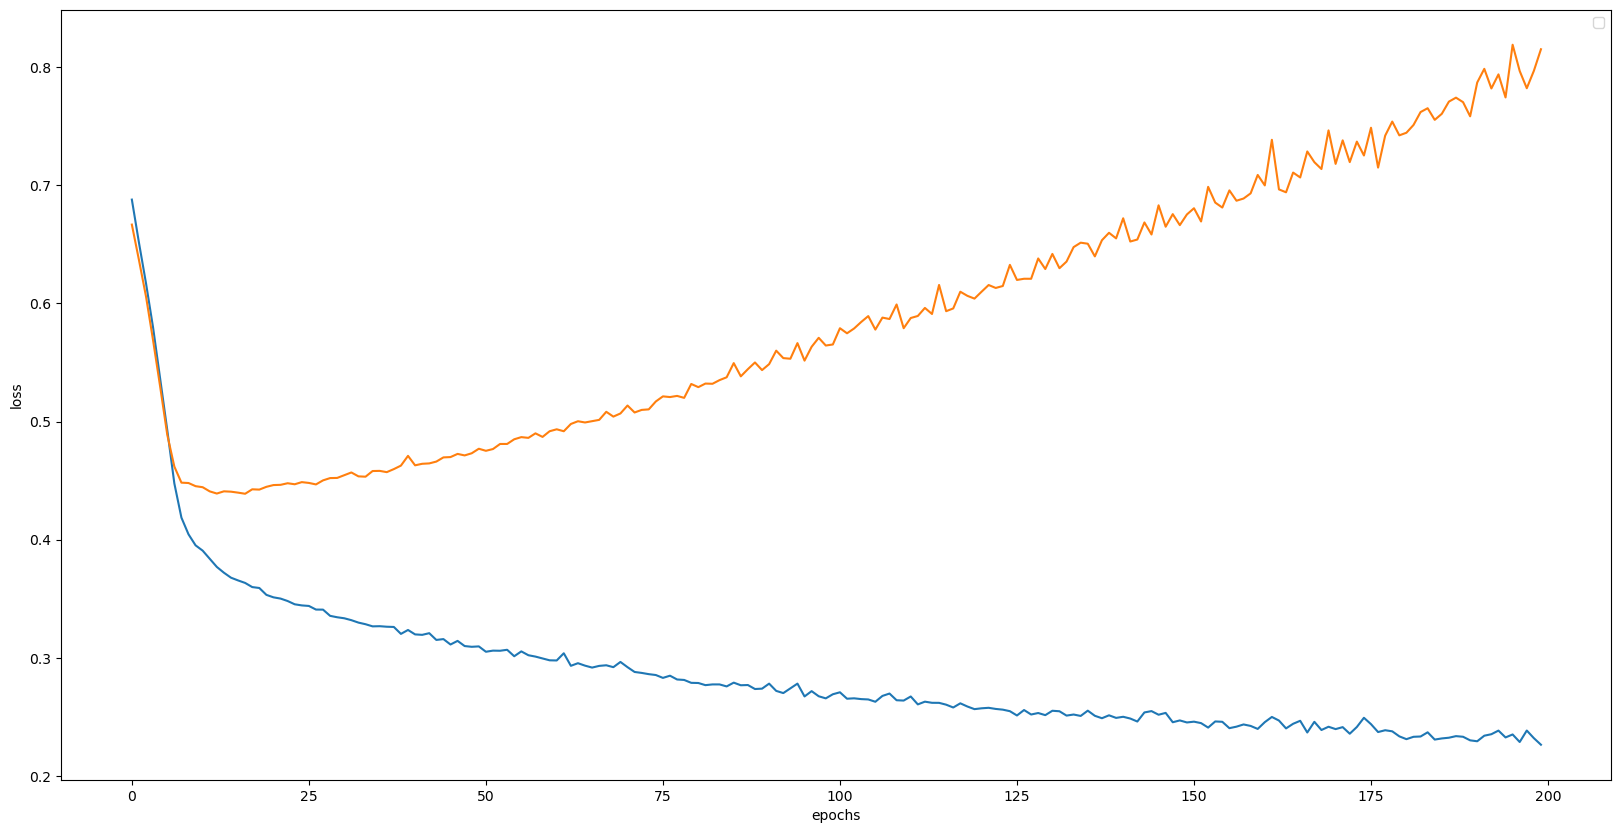

In [36]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('train', 'val')
plt.show()

In [43]:
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 3ms/step


array([[7.99173117e-02],
       [1.27855599e-01],
       [9.61619169e-02],
       [9.99989867e-01],
       [9.96169865e-01],
       [1.88527077e-01],
       [9.67117175e-02],
       [1.74142048e-02],
       [9.47464034e-02],
       [9.05738324e-02],
       [7.32991658e-03],
       [9.91221905e-01],
       [8.01019192e-01],
       [2.92145163e-01],
       [1.25291403e-02],
       [1.38497530e-02],
       [1.91034815e-06],
       [7.19262825e-05],
       [7.20333934e-01],
       [2.61990130e-01],
       [8.08984507e-03],
       [6.32625073e-03],
       [9.56421137e-01],
       [7.68667692e-03],
       [9.99995232e-01],
       [1.27855599e-01],
       [1.27855599e-01],
       [9.99999523e-01],
       [1.70169268e-02],
       [1.00000000e+00],
       [9.96169865e-01],
       [1.38497530e-02],
       [9.98136997e-01],
       [5.47131465e-04],
       [9.98813868e-01],
       [9.26845521e-02],
       [4.78776127e-01],
       [7.57187299e-05],
       [9.26447660e-02],
       [9.47464034e-02],


In [44]:
pred = pd.DataFrame(pred)
pred

,0
0,0.079917
1,0.127856
2,0.096162
3,0.999990
4,0.996170
...,...
619,0.104469
620,1.000000
621,0.017521
622,0.000013


In [45]:
pred = pred[0].apply(lambda x : 1 if x >= 0.7 else 0 )
pred

0      0
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    0
623    0
Name: 0, Length: 624, dtype: int64

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       386
           1       0.79      0.65      0.71       238

    accuracy                           0.80       624
   macro avg       0.80      0.77      0.78       624
weighted avg       0.80      0.80      0.80       624



# Tensorflow Function API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있어
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [47]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [52]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 Input(shape=(독립변수 수, ))
x = Dense(32, activation='relu')(inputs) # 은닉층 1번
x = Dense(64, activation='relu')(x) # 은닉층 2번
x = Dense(32, activation='relu')(x) # 은닉층 3번
x = Dense(16, activation='relu')(x) # 은닉층 4번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                224       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable par

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0 )
print(classification_report(y_test, pred))

Epoch 1/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6839 - accuracy: 0.6000

2024-09-09 15:26:24.475203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:26:24.540436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:26:24.540494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 15:26:24.672227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 107ms/step - loss: 0.6734 - accuracy: 0.6105 - val_loss: 0.6611 - val_accuracy: 0.6186
Epoch 2/400
3/3 [==============================] - 0s 38ms/step - loss: 0.6515 - accuracy: 0.6105 - val_loss: 0.6443 - val_accuracy: 0.6186
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6277 - accuracy: 0.6500

2024-09-09 15:26:24.703453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:26:24.703522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 34ms/step - loss: 0.6331 - accuracy: 0.6105 - val_loss: 0.6303 - val_accuracy: 0.6186
Epoch 4/400
3/3 [==============================] - 0s 36ms/step - loss: 0.6172 - accuracy: 0.6105 - val_loss: 0.6175 - val_accuracy: 0.6186
Epoch 5/400
3/3 [==============================] - 0s 32ms/step - loss: 0.6016 - accuracy: 0.6105 - val_loss: 0.6057 - val_accuracy: 0.6186
Epoch 6/400
3/3 [==============================] - 0s 36ms/step - loss: 0.5869 - accuracy: 0.6105 - val_loss: 0.5955 - val_accuracy: 0.6186
Epoch 7/400
3/3 [==============================] - 0s 33ms/step - loss: 0.5745 - accuracy: 0.6105 - val_loss: 0.5862 - val_accuracy: 0.6186
Epoch 8/400
3/3 [==============================] - 0s 34ms/step - loss: 0.5630 - accuracy: 0.6217 - val_loss: 0.5781 - val_accuracy: 0.6282
Epoch 9/400
3/3 [==============================] - 0s 37ms/step - loss: 0.5513 - accuracy: 0.6367 - val_loss: 0.5714 - val_accuracy: 0.6266
Epoch 10/400
3/3 [==============

3/3 [==============================] - 0s 32ms/step - loss: 0.3245 - accuracy: 0.8614 - val_loss: 0.4918 - val_accuracy: 0.8077
Epoch 62/400
3/3 [==============================] - 0s 39ms/step - loss: 0.3239 - accuracy: 0.8652 - val_loss: 0.4927 - val_accuracy: 0.8077
Epoch 63/400
3/3 [==============================] - 0s 40ms/step - loss: 0.3218 - accuracy: 0.8689 - val_loss: 0.4902 - val_accuracy: 0.8029
Epoch 64/400
3/3 [==============================] - 0s 39ms/step - loss: 0.3215 - accuracy: 0.8764 - val_loss: 0.4904 - val_accuracy: 0.8045
Epoch 65/400
3/3 [==============================] - 0s 35ms/step - loss: 0.3206 - accuracy: 0.8727 - val_loss: 0.4933 - val_accuracy: 0.8093
Epoch 66/400
3/3 [==============================] - 0s 35ms/step - loss: 0.3191 - accuracy: 0.8689 - val_loss: 0.4932 - val_accuracy: 0.8045
Epoch 67/400
3/3 [==============================] - 0s 42ms/step - loss: 0.3181 - accuracy: 0.8764 - val_loss: 0.4935 - val_accuracy: 0.8045
Epoch 68/400
3/3 [========

3/3 [==============================] - 0s 37ms/step - loss: 0.2797 - accuracy: 0.8876 - val_loss: 0.5677 - val_accuracy: 0.8061
Epoch 120/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2783 - accuracy: 0.8876 - val_loss: 0.5706 - val_accuracy: 0.8045
Epoch 121/400
3/3 [==============================] - 0s 32ms/step - loss: 0.2779 - accuracy: 0.8727 - val_loss: 0.5745 - val_accuracy: 0.7981
Epoch 122/400
3/3 [==============================] - 0s 43ms/step - loss: 0.2798 - accuracy: 0.8801 - val_loss: 0.5758 - val_accuracy: 0.7949
Epoch 123/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2794 - accuracy: 0.8801 - val_loss: 0.5709 - val_accuracy: 0.8045
Epoch 124/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2790 - accuracy: 0.8876 - val_loss: 0.5728 - val_accuracy: 0.8045
Epoch 125/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2760 - accuracy: 0.8876 - val_loss: 0.5741 - val_accuracy: 0.8061
Epoch 126/400
3/3 [=

Epoch 177/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2415 - accuracy: 0.8914 - val_loss: 0.6985 - val_accuracy: 0.7965
Epoch 178/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2405 - accuracy: 0.8951 - val_loss: 0.7002 - val_accuracy: 0.7981
Epoch 179/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2418 - accuracy: 0.8951 - val_loss: 0.7011 - val_accuracy: 0.7949
Epoch 180/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2412 - accuracy: 0.8951 - val_loss: 0.7114 - val_accuracy: 0.7901
Epoch 181/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2411 - accuracy: 0.8951 - val_loss: 0.7101 - val_accuracy: 0.7949
Epoch 182/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2362 - accuracy: 0.8914 - val_loss: 0.7041 - val_accuracy: 0.7933
Epoch 183/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2417 - accuracy: 0.8914 - val_loss: 0.7100 - val_accuracy: 0.7949
Epoch 

Epoch 235/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2110 - accuracy: 0.9101 - val_loss: 0.8684 - val_accuracy: 0.7869
Epoch 236/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2097 - accuracy: 0.9101 - val_loss: 0.8894 - val_accuracy: 0.7853
Epoch 237/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2112 - accuracy: 0.9064 - val_loss: 0.9128 - val_accuracy: 0.7853
Epoch 238/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2116 - accuracy: 0.9064 - val_loss: 0.8891 - val_accuracy: 0.7917
Epoch 239/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2149 - accuracy: 0.9026 - val_loss: 0.8782 - val_accuracy: 0.7837
Epoch 240/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2102 - accuracy: 0.9139 - val_loss: 0.9059 - val_accuracy: 0.7837
Epoch 241/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2111 - accuracy: 0.9064 - val_loss: 0.9309 - val_accuracy: 0.7885
Epoch 

Epoch 293/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1893 - accuracy: 0.9288 - val_loss: 1.0314 - val_accuracy: 0.7772
Epoch 294/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1888 - accuracy: 0.9213 - val_loss: 1.0452 - val_accuracy: 0.7772
Epoch 295/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1882 - accuracy: 0.9139 - val_loss: 1.0556 - val_accuracy: 0.7788
Epoch 296/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1910 - accuracy: 0.9288 - val_loss: 1.0540 - val_accuracy: 0.7740
Epoch 297/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1883 - accuracy: 0.9251 - val_loss: 1.0797 - val_accuracy: 0.7821
Epoch 298/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1892 - accuracy: 0.9251 - val_loss: 1.0632 - val_accuracy: 0.7853
Epoch 299/400
3/3 [==============================] - 0s 32ms/step - loss: 0.1861 - accuracy: 0.9288 - val_loss: 1.0527 - val_accuracy: 0.7804
Epoch 

Epoch 351/400
3/3 [==============================] - 0s 39ms/step - loss: 0.1715 - accuracy: 0.9326 - val_loss: 1.2037 - val_accuracy: 0.7821
Epoch 352/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1785 - accuracy: 0.9251 - val_loss: 1.1984 - val_accuracy: 0.7821
Epoch 353/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1732 - accuracy: 0.9326 - val_loss: 1.1874 - val_accuracy: 0.7740
Epoch 354/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1716 - accuracy: 0.9326 - val_loss: 1.2017 - val_accuracy: 0.7756
Epoch 355/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1744 - accuracy: 0.9288 - val_loss: 1.2226 - val_accuracy: 0.7756
Epoch 356/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1701 - accuracy: 0.9326 - val_loss: 1.2185 - val_accuracy: 0.7724
Epoch 357/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1697 - accuracy: 0.9326 - val_loss: 1.2073 - val_accuracy: 0.7740
Epoch 

2024-09-09 15:26:58.879440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


/tmp/ipykernel_21723/147426426.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('train', 'val')


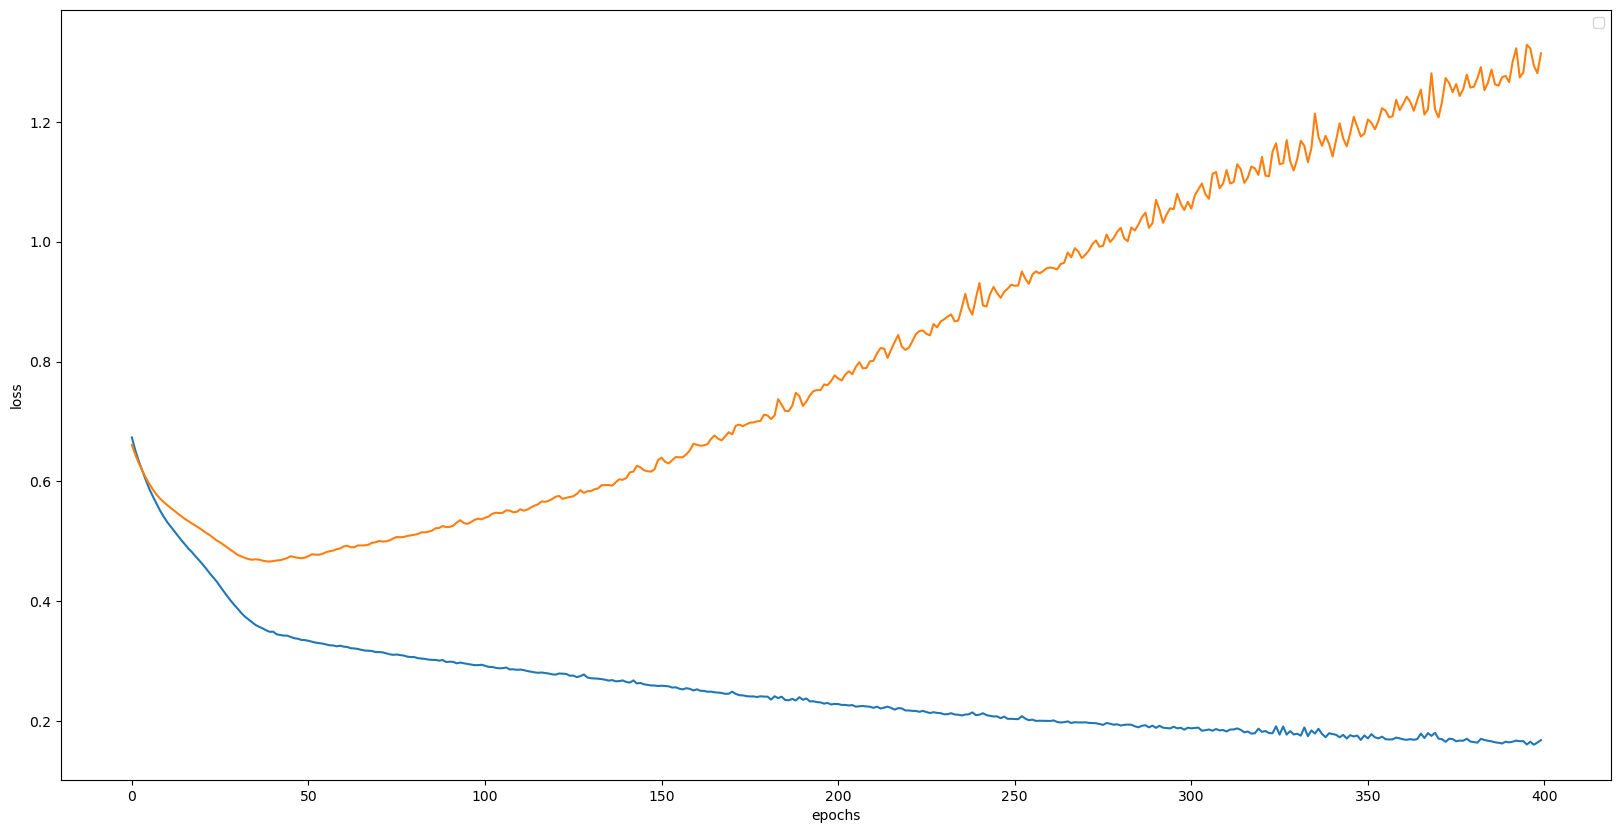

In [54]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('train', 'val')
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성

In [58]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [59]:
model = Titanic()

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 5 else 0)
print(classification_report(y_test, pred))

Epoch 1/200


2024-09-09 15:47:49.585566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:49.649260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:49.649341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 796ms/step - loss: 0.6591 - accuracy: 0.6854 - val_loss: 0.6486 - val_accuracy: 0.7404
Epoch 2/200
1/1 [==============================] - 0s 54ms/step - loss: 0.6517 - accuracy: 0.7041 - val_loss: 0.6430 - val_accuracy: 0.7660
Epoch 3/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6440 - accuracy: 0.7266 - val_loss: 0.6375 - val_accuracy: 0.7724
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.6364 - accuracy: 0.7566

2024-09-09 15:47:50.013008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:50.038735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:50.038801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 57ms/step - loss: 0.6364 - accuracy: 0.7566 - val_loss: 0.6319 - val_accuracy: 0.7724
Epoch 5/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6288 - accuracy: 0.7640 - val_loss: 0.6263 - val_accuracy: 0.7724
Epoch 6/200
1/1 [==============================] - 0s 52ms/step - loss: 0.6214 - accuracy: 0.7640 - val_loss: 0.6207 - val_accuracy: 0.7804
Epoch 7/200
1/1 [==============================] - 0s 44ms/step - loss: 0.6142 - accuracy: 0.7678 - val_loss: 0.6153 - val_accuracy: 0.7756
Epoch 8/200
1/1 [==============================] - 0s 54ms/step - loss: 0.6071 - accuracy: 0.7865 - val_loss: 0.6101 - val_accuracy: 0.7772
Epoch 9/200
1/1 [==============================] - 0s 54ms/step - loss: 0.6003 - accuracy: 0.7865 - val_loss: 0.6049 - val_accuracy: 0.7788
Epoch 10/200
1/1 [==============================] - 0s 49ms/step - loss: 0.5936 - accuracy: 0.7940 - val_loss: 0.5998 - val_accuracy: 0.7837
Epoch 11/200
1/1 [=============

1/1 [==============================] - 0s 87ms/step - loss: 0.3834 - accuracy: 0.8240 - val_loss: 0.4534 - val_accuracy: 0.7933
Epoch 63/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3818 - accuracy: 0.8315 - val_loss: 0.4527 - val_accuracy: 0.7949
Epoch 64/200
1/1 [==============================] - 0s 47ms/step - loss: 0.3802 - accuracy: 0.8277 - val_loss: 0.4520 - val_accuracy: 0.7997
Epoch 65/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3786 - accuracy: 0.8277 - val_loss: 0.4514 - val_accuracy: 0.8061
Epoch 66/200
1/1 [==============================] - 0s 57ms/step - loss: 0.3771 - accuracy: 0.8315 - val_loss: 0.4508 - val_accuracy: 0.8045
Epoch 67/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3756 - accuracy: 0.8315 - val_loss: 0.4503 - val_accuracy: 0.8029
Epoch 68/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3742 - accuracy: 0.8315 - val_loss: 0.4497 - val_accuracy: 0.8061
Epoch 69/200
1/1 [========

1/1 [==============================] - 0s 52ms/step - loss: 0.3317 - accuracy: 0.8652 - val_loss: 0.4619 - val_accuracy: 0.8189
Epoch 121/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3312 - accuracy: 0.8652 - val_loss: 0.4624 - val_accuracy: 0.8189
Epoch 122/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3307 - accuracy: 0.8652 - val_loss: 0.4628 - val_accuracy: 0.8189
Epoch 123/200
1/1 [==============================] - 0s 54ms/step - loss: 0.3301 - accuracy: 0.8652 - val_loss: 0.4632 - val_accuracy: 0.8189
Epoch 124/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3296 - accuracy: 0.8652 - val_loss: 0.4636 - val_accuracy: 0.8173
Epoch 125/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3291 - accuracy: 0.8652 - val_loss: 0.4640 - val_accuracy: 0.8173
Epoch 126/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3285 - accuracy: 0.8689 - val_loss: 0.4645 - val_accuracy: 0.8173
Epoch 127/200
1/1 [=

Epoch 178/200
1/1 [==============================] - 0s 53ms/step - loss: 0.3033 - accuracy: 0.8764 - val_loss: 0.4920 - val_accuracy: 0.8093
Epoch 179/200
1/1 [==============================] - 0s 60ms/step - loss: 0.3029 - accuracy: 0.8764 - val_loss: 0.4927 - val_accuracy: 0.8093
Epoch 180/200
1/1 [==============================] - 0s 55ms/step - loss: 0.3024 - accuracy: 0.8764 - val_loss: 0.4934 - val_accuracy: 0.8093
Epoch 181/200
1/1 [==============================] - 0s 54ms/step - loss: 0.3020 - accuracy: 0.8764 - val_loss: 0.4942 - val_accuracy: 0.8077
Epoch 182/200
1/1 [==============================] - 0s 53ms/step - loss: 0.3015 - accuracy: 0.8764 - val_loss: 0.4949 - val_accuracy: 0.8077
Epoch 183/200
1/1 [==============================] - 0s 49ms/step - loss: 0.3011 - accuracy: 0.8764 - val_loss: 0.4957 - val_accuracy: 0.8077
Epoch 184/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3006 - accuracy: 0.8764 - val_loss: 0.4965 - val_accuracy: 0.8077
Epoch 

2024-09-09 15:48:01.816541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 